<center><img src='./img/cs-logo.png' width=200></center>

<hr style=" border:none; height:3px;">
<h1>
<center>Influence Maximisation - LT and IC Models </center>
</h1>
<font  size="3" color='#91053d'>
<center >
nacera.seghouani@centralesupelec.fr 
</center>
</font>   
<hr style=" border:none; height:3px;">

#####  Introduction (PLEASE READ ME)


<p align="justify">
<font size="3">
The purpose of this lab is to implement diffusion models   basic **Linear Threshold (LT)** and  **Independant Cascade (IC)** models using networkx Python package. The graph could be weighted  using for each edge (u,v) 1/d_v as a weight or For nodes u,v, u has a total probability of 1 − (1 −p) of activating v (for p = 1% and 10%). More precisely:
<ol>
<li>Implement two functions ic and lt where the inputs are (G, S) and the output is the set of infected nodes.  </li>
<li> S (budget k) could be computed randomly, using the highest degrees,  and other measures such as betweeness centrality. Compare the different heuristics  results on some graphs (curves according to the number of iteration a  </li>
<li> Implement Greedy algorithm and compare the results on graphs to the different heuristics</li> 
</ol>
</font>
</p>




# create a random directed graph
it is set as 200 nodes
and the darkness of the color shows nodes' indegree

In [28]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.generators.triads import DiGraph

In [29]:
def generateGraph(numNodes):
    # Use seed when creating the graph for reproducibility
    G_undirected = nx.random_geometric_graph(numNodes, 0.125, seed=896803)
    G = DiGraph()
    # add_nodes_from(G.edges())
    G.add_nodes_from(G_undirected.nodes())
    q = 0.5  #keep 10% of the edges
    for u,v in G_undirected.edges():
        if random.random()<q:
            G.add_edge(u,v)
        else:
            G.add_edge(v,u)
    # position is stored as node attribute data for random_geometric_graph
    pos = nx.get_node_attributes(G_undirected, "pos")
    # find node near center (0.5,0.5)
    return G,pos
G,pos=generateGraph(200)

In [30]:
def drawGraph(G, colorDict,weights):
  plt.figure(figsize=(8, 8))
  nx.draw_networkx_edges(G, pos=pos, alpha=0.4,)
  # nx.draw_networkx_edge_labels(G,pos,edge_labels=weights,font_size=6,verticalalignment='bottom')
  nx.draw_networkx_nodes(
      G,
      pos,
      nodelist=list(colorDict.keys()),
      node_size=80,
      node_color=list(colorDict.values()),
      cmap=plt.cm.Purples,
  )
  plt.xlim(-0.05, 1.05)
  plt.ylim(-0.05, 1.05)
  plt.axis("off")
  plt.show()

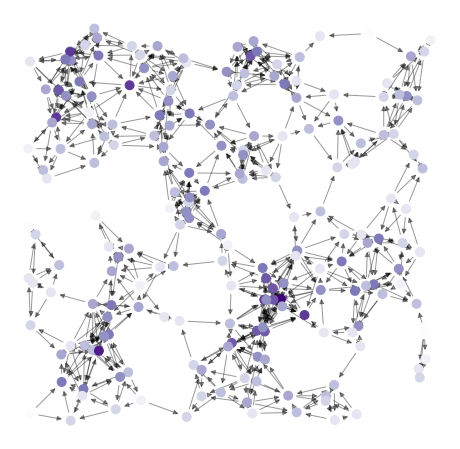

In [31]:
n_color={}
for n in G.nodes():
  n_color[n] = G.in_degree(n)
# weights = nx.get_edge_attributes(G,'weight')
drawGraph(G,n_color,[])

# compute the centrality attributes of each node

In [32]:
#set the node attriutes of a graph
def setNodeAttributes(G):
  nx.set_node_attributes(G, nx.betweenness_centrality(G), "betweenness")
  nx.set_node_attributes(G, nx.degree_centrality(G), "degree_centrality")
  nx.set_node_attributes(G, nx.in_degree_centrality(G), "in_degree_centrality")
  nx.set_node_attributes(G, nx.out_degree_centrality(G), "out_degree_centrality")
  nx.set_node_attributes(G, nx.eigenvector_centrality(G), "eigenvector_centrality")
  nx.set_node_attributes(G, nx.katz_centrality(G), "katz_centrality")
  nx.set_node_attributes(G, nx.pagerank(G), "pagerank")
  nx.set_node_attributes(G, nx.closeness_centrality(G), "closeness_centrality")
  nx.set_node_attributes(G, nx.harmonic_centrality(G), "harmonic_centrality")
  nx.set_node_attributes(G, nx.clustering(G), "clustering")

In [33]:
setNodeAttributes(G)

# Generate intial seeds, randomly, or according to the centrality score

In [34]:
values = ["random","betweenness", "degree_centrality", "in_degree_centrality","out_degree_centrality","eigenvector_centrality","katz_centrality","pagerank","closeness_centrality","harmonic_centrality", "clustering"]
def seedsGeneration(G,k,a):
    if a in values:
      if a=="random":
        return random.sample(range(G.number_of_nodes()),k) 
      else: 
        d=nx.get_node_attributes(G, a)
        dict_sorted=dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
        return list(dict_sorted.keys())[:k]
    else:
      return("select a method from \"random","betweenness", "degree_centrality", "in_degree_centrality","out_degree_centrality","eigenvector_centrality","katz_centrality","pagerank","closeness_centrality","harmonic_centrality", "clustering")

# Algotrithm 1. independantCascade

In [35]:
def independantCascade(G,k,p=None):
  if p is None or (p>=0 and p<=1):
    dict_seeds={}
    for value in values:
      dict_seeds[str(value)]=seedsGeneration(G,k, value)
    # print("Initial seeds are:")
    # print(dict_seeds)
    # print("_________________________")


    dict_numCumulativeInfected={}
    for value in values:
      seeds=dict_seeds[value]
      cumulativeInfected=seeds
      numCumulativeInfected=[]
      while len(seeds)>0:
        numCumulativeInfected.append(len(cumulativeInfected))
        newlyInfected=[]
        for u,v in G.edges():
          if u in seeds:
            if p is None:
              p=(1/G.in_degree(v))
            if random.random()<p:
                newlyInfected.append(v)           
        newlyInfected=list(set(newlyInfected)-set(cumulativeInfected))
        cumulativeInfected=cumulativeInfected+newlyInfected
        seeds=newlyInfected
      dict_numCumulativeInfected[value]=numCumulativeInfected
  else:
    return print("The infected possiblity should be between 0 and 1, or 1 over indegree by default.")
  # print("The amount of infected nodes evloves along time as:  ")
  # print(dict_numCumulativeInfected)
  return dict_numCumulativeInfected

In [36]:
res=independantCascade(G,10)

In [37]:
res

{'random': [10, 18, 23, 25, 26],
 'betweenness': [10, 18, 22, 25, 27, 28],
 'degree_centrality': [10, 16, 17, 18],
 'in_degree_centrality': [10, 12, 13],
 'out_degree_centrality': [10, 22, 26],
 'eigenvector_centrality': [10, 11],
 'katz_centrality': [10, 14, 19, 20, 21],
 'pagerank': [10, 15, 16, 18],
 'closeness_centrality': [10, 12],
 'harmonic_centrality': [10, 15, 18],
 'clustering': [10, 11]}

## plot the result

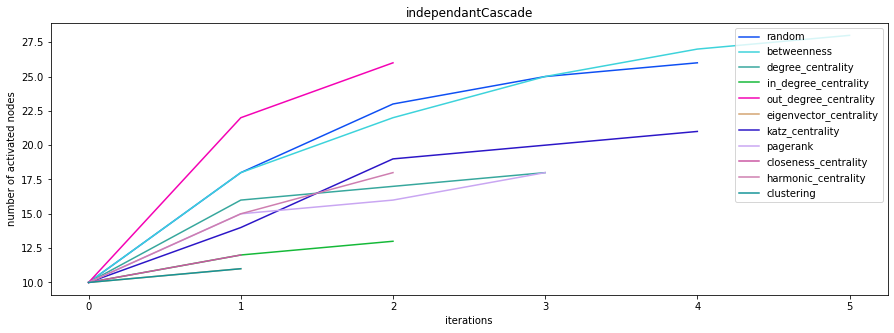

In [38]:
# run once, the x-axis is the iterations over time
plt.figure(figsize=(15,5))
for key, value in res.items():
    plt.plot([i for i in range(0,len(value))],value,color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),label=key)
plt.title('independantCascade')
plt.xlabel('iterations')
plt.ylabel('number of activated nodes')
plt.legend(loc="upper right")
plt.show()

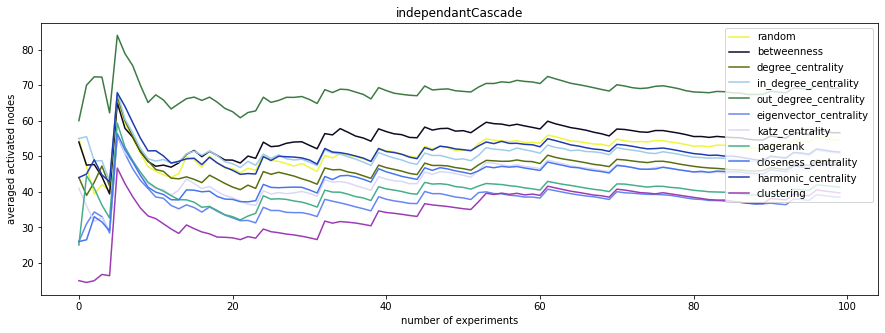

In [39]:
# run 100 times, the x-axis is the N-th time
# df_res=pd.DataFrame()
# for i in range(0,100):
#     res=independantCascade(G,10)
#     for j in range(0,len(res)):
#         df_res.loc[i,j]=list(res.values())[j][-1]
# df_res.columns=values

df_res_averaged=pd.DataFrame()
res=independantCascade(G,10)
for j in range(0,len(res)):
    df_res_averaged.loc[0,j]=list(res.values())[j][-1]
for i in range(1,100):
    res=independantCascade(G,10)
    for j in range(0,len(res)):
        df_res_averaged.loc[i,j]=(df_res_averaged.loc[i-1,j]*i+list(res.values())[j][-1])/(i+1)
df_res_averaged.columns=values
plt.figure(figsize=(15,5))
for value in values:
    plt.plot(df_res_averaged.index,df_res_averaged[value],color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),label=value)
plt.title('independantCascade')
plt.xlabel('number of experiments')
plt.ylabel('averaged activated nodes')
plt.legend(loc="upper right")
plt.show()

# Algotrithm 2. linearThreshold

In [40]:
def activatedThreshold(G):
  dict_random={}
  for i in range(0,200):
    dict_random[i]=random.random()
  nx.set_node_attributes(G,dict_random, "activatedThreshold")
activatedThreshold(G)

In [41]:
def linearThreshold(G,k):
  dict_seeds={}
  for value in values:
    dict_seeds[str(value)]=seedsGeneration(G,k,value)
  # print("Initial seeds are:")
  # print(dict_seeds)
  # print("_________________________")
  
  dict_numCumulativeInfected={}
  for value in values:
    seeds=dict_seeds[value]
    numCumulativeInfected=[]
    updating=True
    while updating is True:
      updating=False
      numCumulativeInfected.append(len(seeds))
      unActivatedNodes=set(G.nodes())-set(seeds)
      for v in unActivatedNodes:
        numActivatedPredecessors=len(list(set(seeds)&set(G.predecessors(v))))
        if numActivatedPredecessors>0:
          if numActivatedPredecessors>=(float(G.nodes()[v]['activatedThreshold'])*float(G.in_degree(v))):
              seeds.append(v)
              updating=True
    dict_numCumulativeInfected[value]=numCumulativeInfected
  # print("The amount of infected nodes evloves along time as:  ")
  # print(dict_numCumulativeInfected)
  return dict_numCumulativeInfected

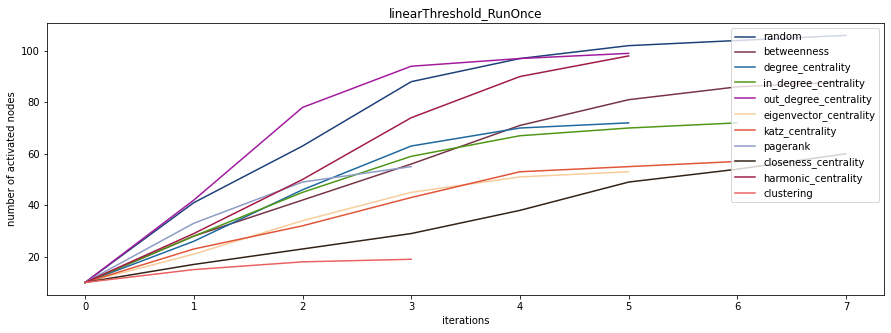

In [42]:
# run for once
def plotLinearThresholdOnce(G,k):
    res=linearThreshold(G,k)
    plt.figure(figsize=(15,5))
    for key, value in res.items():
        plt.plot([i for i in range(0,len(value))],value,color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),label=key)
    plt.title('linearThreshold_RunOnce')
    plt.xlabel('iterations')
    plt.ylabel('number of activated nodes')
    plt.legend(loc="upper right")
    plt.show()
plotLinearThresholdOnce(G,10)

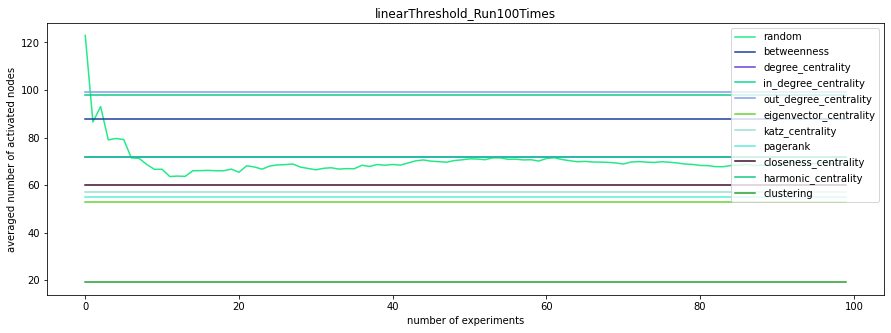

In [43]:
# run 100 times, the x-axis is the N-th time
def plotLinearThreshold100Times(G,k):
    df_res_averaged=pd.DataFrame()
    res=linearThreshold(G,k)
    for j in range(0,len(res)):
        df_res_averaged.loc[0,j]=list(res.values())[j][-1]
    for i in range(1,100):
        res=linearThreshold(G,k)
        for j in range(0,len(res)):
            df_res_averaged.loc[i,j]=(df_res_averaged.loc[i-1,j]*i+list(res.values())[j][-1])/(i+1)
    df_res_averaged.columns=values
    plt.figure(figsize=(15,5))
    for value in values:
        plt.plot(df_res_averaged.index,df_res_averaged[value],color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),label=value)
    plt.title('linearThreshold_Run100Times')
    plt.xlabel('number of experiments')
    plt.ylabel('averaged number of activated nodes')
    plt.legend(loc="upper right")
    plt.show()
plotLinearThreshold100Times(G,10)

# Algotrithm 3. greedy

In [44]:
activatedList={}
iterations=0
def greedySeeds(G,k):
  global iterations
  if iterations<k:
    iterations=iterations+1
    unactivatedList=(set((G.nodes()))-set(activatedList.keys()))
    if len(unactivatedList)>0: 
      dict_sigmaNode={}
      for u in unactivatedList:
        seeds=[]
        numCumulativeInfected=[]
        seeds.append(u)
        updating=True
        while updating is True: 
          updating=False
          numCumulativeInfected.append(len(seeds))
          unActivatedNodes=set(G.nodes())-set(seeds)
          for v in unActivatedNodes:
            numActivatedPredecessors=len((set(seeds)&set(G.predecessors(v))))
            if numActivatedPredecessors>0:
              if numActivatedPredecessors>=(float(G.nodes()[v]['activatedThreshold'])*float(G.in_degree(v))):
                seeds.append(v)
                updating=True
        dict_sigmaNode[u]=numCumulativeInfected[-1]
      dict_sigmaNode_sorted=dict(sorted(dict_sigmaNode.items(), key=lambda x: x[1], reverse=True))
      for key, value in dict_sigmaNode_sorted.items():
        activatedList[key]=value
        break
      return greedy(G,k)
    else:
      return [i for i in activatedList.keys()]
      # return "The first " +str(k) +" activated nodes under greedy methods are, in orders, "+ str([i for i in activatedList.keys()])
  else:
    return [i for i in activatedList.keys()]

In [45]:
print("The seeds generated by greedy algorithms are: ")
greedySeeds(G,10)

The seeds generated by greedy algorithms are: 


[72, 172, 131, 151, 11, 29, 47, 66, 111, 149]

In [46]:
def independantCascade_Greedy(G,k,p=None):
    seeds=greedy(G,k)
    cumulativeInfected=seeds
    numCumulativeInfected=[]
    while len(seeds)>0:
      numCumulativeInfected.append(len(cumulativeInfected))
      newlyInfected=[]
      for u,v in G.edges():
        if u in seeds:
          if p is None:
            p=(1/G.in_degree(v))
          if random.random()<p:
              newlyInfected.append(v)           
      newlyInfected=list(set(newlyInfected)-set(cumulativeInfected))
      cumulativeInfected=cumulativeInfected+newlyInfected
      seeds=newlyInfected
    return numCumulativeInfected

In [47]:
print("The evolving of the number of activated nodes under greedy algorithms is: ")
independantCascade_Greedy(G,10)

The evolving of the number of activated nodes under greedy algorithms is: 


[10, 23, 29, 35, 41, 44, 48, 51, 53]